In [1]:
from os import path

# Third-party
import astropy.coordinates as coord
from astropy.table import Table, vstack
from astropy.io import fits, ascii
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from pyvo.dal import TAPService
from pyia import GaiaData

import gala.coordinates as gc
from gala.mpl_style import center_emph

Bigger polygon!

In [55]:
# for r in gc.GD1(phi1=[260, 260, 270, 270]*u.deg, 
#                 phi2=[-7.5, 2.5, 2.5, -7.5]*u.deg).transform_to(coord.ICRS):
#     print('{0:.3f}, {1:.3f},'.format(r.ra.degree, r.dec.degree))

# for r in gc.GD1(phi1=[270, 270, 280, 280]*u.deg, 
#                 phi2=[-7.5, 2.5, 2.5, -7.5]*u.deg).transform_to(coord.ICRS):
#     print('{0:.3f}, {1:.3f},'.format(r.ra.degree, r.dec.degree))

# for r in gc.GD1(phi1=[280, 280, 300, 300]*u.deg, 
#                 phi2=[-5, 5, 5, -5]*u.deg).transform_to(coord.ICRS):
#     print('{0:.3f}, {1:.3f},'.format(r.ra.degree, r.dec.degree))

# for r in gc.GD1(phi1=[300, 300, 320, 320]*u.deg, 
#                 phi2=[-5, 5, 5, -5]*u.deg).transform_to(coord.ICRS):
#     print('{0:.3f}, {1:.3f},'.format(r.ra.degree, r.dec.degree))

# for r in gc.GD1(phi1=[340, 340, 360, 360]*u.deg, 
#                 phi2=[-5, 5, 5, -5]*u.deg).transform_to(coord.ICRS):
#     print('{0:.3f}, {1:.3f},'.format(r.ra.degree, r.dec.degree))

# for r in gc.GD1(phi1=[0, 0, 20, 20]*u.deg, 
#                 phi2=[-7.5, 2.5, 2.5, -7.5]*u.deg).transform_to(coord.ICRS):
#     print('{0:.3f}, {1:.3f},'.format(r.ra.degree, r.dec.degree))

# for r in gc.GD1(phi1=[20, 20, 40, 40]*u.deg, 
#                 phi2=[-7.5, 2.5, 2.5, -7.5]*u.deg).transform_to(coord.ICRS):
#     print('{0:.3f}, {1:.3f},'.format(r.ra.degree, r.dec.degree))

for r in gc.GD1(phi1=[40, 40, 50, 50]*u.deg, 
                phi2=[-10, 0, 0, -10]*u.deg).transform_to(coord.ICRS):
    print('{0:.3f}, {1:.3f},'.format(r.ra.degree, r.dec.degree))

257.979, 39.345,
266.847, 46.988,
276.291, 39.701,
267.196, 32.885,


```
SELECT *
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND bp_rp > 0 AND bp_rp < 1.75 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               POLYGON('ICRS', 
					   257.979, 39.345,
266.847, 46.988,
276.291, 39.701,
267.196, 32.885)) = 1 
```

In [4]:
# tap = TAPService("http://tapvizier.u-strasbg.fr/TAPVizieR/tap")

In [5]:
# query = """SELECT TOP 100 *
# FROM \"I/345/gaia2\"
# WHERE parallax < 1 AND
#       DISTANCE(POINT('ICRS', 34.59, 29.73),
#                POINT('ICRS', ra, dec)) > 87 AND
#       DISTANCE(POINT('ICRS', 34.59, 29.73),
#                POINT('ICRS', ra, dec)) < 93
# """
# # res = tap.search(query, maxrec=100000)
# job = tap.submit_job(query)

In [2]:
all_filename = '../data/gd1-all.fits'

if not path.exists(all_filename):
    keep_cols = ['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'visibility_periods_used', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_flux_over_error', 'phot_g_mean_mag', 'phot_bp_n_obs', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error', 'phot_bp_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_rp_n_obs', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error', 'phot_rp_mean_flux_over_error', 'phot_rp_mean_mag', 'phot_bp_rp_excess_factor', 'phot_proc_mode', 'bp_rp', 'bp_g', 'g_rp', 'radial_velocity', 'radial_velocity_error', 'a_g_val', 'a_g_percentile_lower', 'a_g_percentile_upper', 'e_bp_min_rp_val', 'e_bp_min_rp_percentile_lower', 'e_bp_min_rp_percentile_upper']
    t1 = Table(fits.getdata('../data/gd1-polygon.fits'))[keep_cols]
    t2 = Table(fits.getdata('../data/gd1-polygon2.fits'))[keep_cols]
    t3 = Table(fits.getdata('../data/gd1-polygon3.fits'))[keep_cols]
    t4 = Table(fits.getdata('../data/gd1-polygon4.fits'))[keep_cols]
    t5 = Table(fits.getdata('../data/gd1-polygon5.fits'))[keep_cols]
    t6 = Table(fits.getdata('../data/gd1-polygon6.fits'))[keep_cols]
    t7 = Table(fits.getdata('../data/gd1-polygon7.fits'))[keep_cols]
    t = vstack((t1, t2, t3, t4, t5, t6, t7))
    _, idx = np.unique(t['source_id'], return_index=True)
    t = t[idx]
    t.write(all_filename)

In [61]:
g = GaiaData(all_filename)
phot_mask = g.phot_bp_mean_mag < 20.5*u.mag
g = g[phot_mask]

c = coord.SkyCoord(ra=g.ra, dec=g.dec,
                   pm_ra_cosdec=g.pmra, pm_dec=g.pmdec)
gd1_c_raw = c.transform_to(gc.GD1)
# g = g[g.parallax > 0]

/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


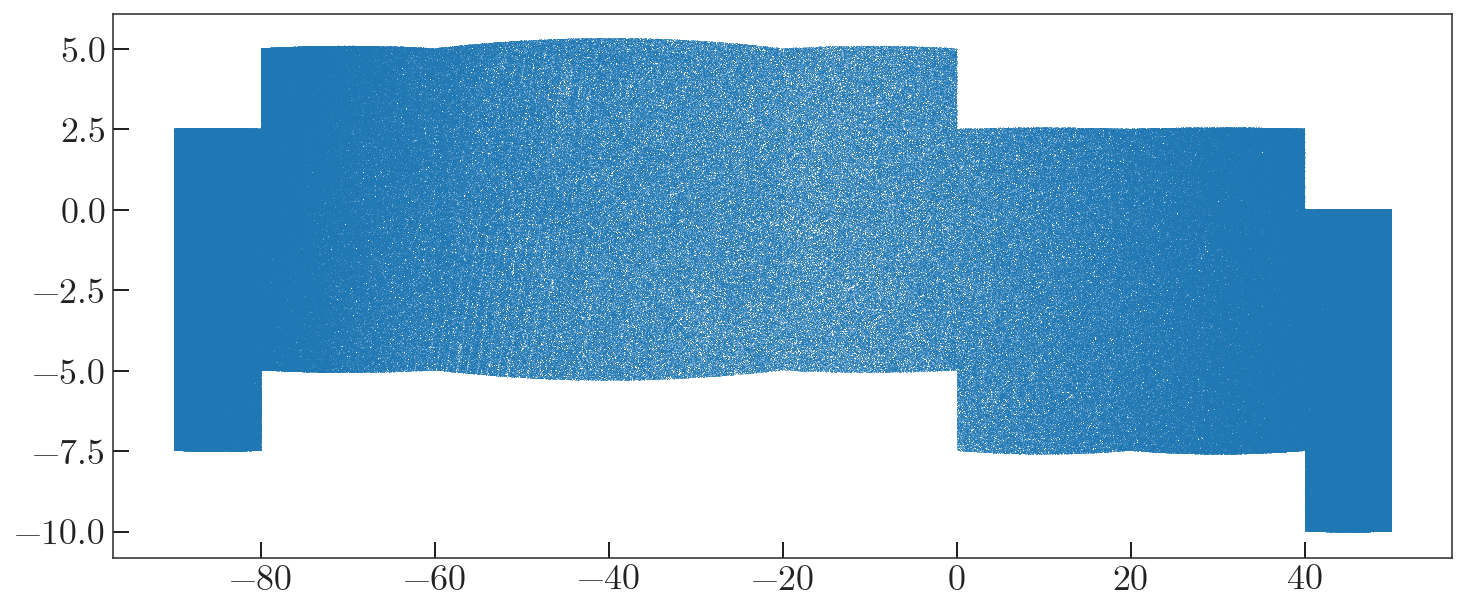

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(gd1_c_raw.phi1.wrap_at(180*u.deg).degree, gd1_c_raw.phi2.degree, 
        marker=',', linestyle='none', alpha=0.5);

In [63]:
def gd1_dist(phi1):
    # 0, 10
    # -60, 7
    m = (10-7) / (60)
    return (m*phi1.wrap_at(180*u.deg).value + 10) * u.kpc

def gd1_dist2(phi1):
    _phi1 = phi1.wrap_at(180*u.deg).degree
    return (1.3E-3 * (_phi1 - (-45))**2 + 7) * u.kpc

In [64]:
gd1_c_dist = gc.GD1(phi1=gd1_c_raw.phi1, phi2=gd1_c_raw.phi2,
                    distance=gd1_dist(gd1_c_raw.phi1),
#                     distance=gd1_dist2(gd1_c_raw.phi1),
                    pm_phi1_cosphi2=gd1_c_raw.pm_phi1_cosphi2,
                    pm_phi2=gd1_c_raw.pm_phi2,
                    radial_velocity=np.zeros(len(gd1_c_raw))*u.km/u.s)

# Correct for reflex motion
v_sun = coord.Galactocentric.galcen_v_sun
observed = gd1_c_dist.transform_to(coord.Galactic)
rep = observed.cartesian.without_differentials()
rep = rep.with_differentials(observed.cartesian.differentials['s'] + v_sun)
# gd1_c_nosunv = coord.Galactic(rep).transform_to(gc.GD1)
gd1_c = coord.Galactic(rep).transform_to(gc.GD1)

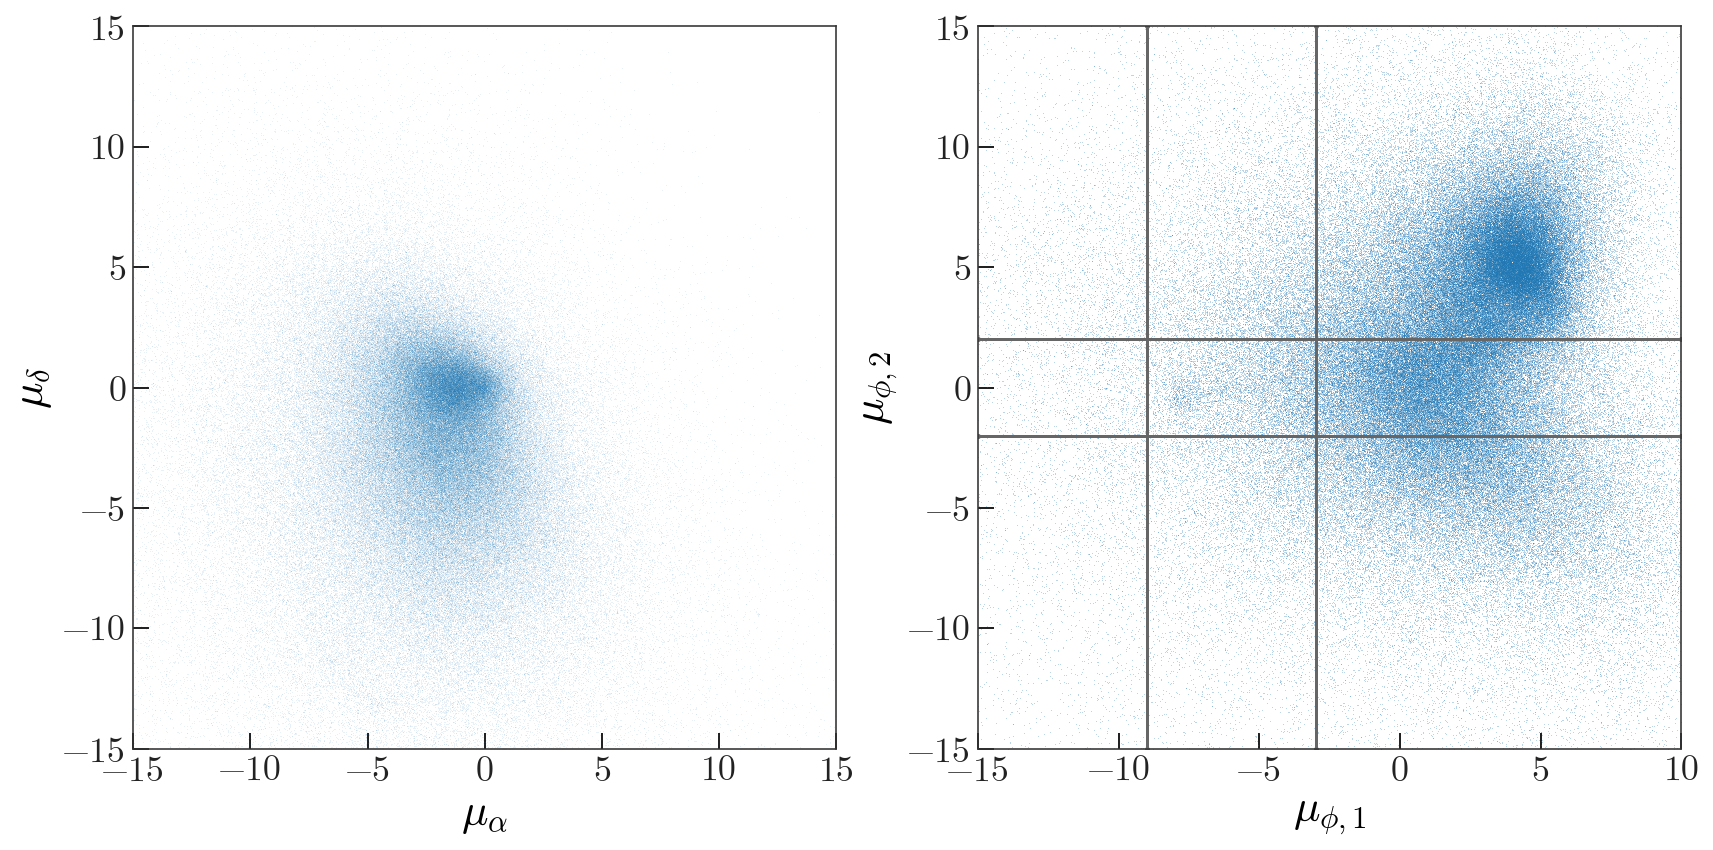

In [65]:
phi2_mask = np.abs(gd1_c.phi2) < 0.5*u.deg
# phi2_mask = np.ones(len(gd1_c)).astype(bool)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
ax.plot(g.pmra[phi2_mask].to(u.mas/u.yr), 
        g.pmdec[phi2_mask].to(u.mas/u.yr), 
        marker=',', linestyle='none', alpha=0.1)

ax.set_xlim(-15, 15.)
ax.set_ylim(-15, 15)
ax.set_xlabel(r'$\mu_\alpha$')
ax.set_ylabel(r'$\mu_\delta$')

ax = axes[1]
ax.plot(gd1_c.pm_phi1_cosphi2[phi2_mask].to(u.mas/u.yr), 
        gd1_c.pm_phi2[phi2_mask].to(u.mas/u.yr), 
        marker=',', linestyle='none', alpha=0.3)

ax.axvline(-9)
ax.axvline(-3)
ax.axhline(2.)
ax.axhline(-2)

ax.set_xlim(-15, 10)
ax.set_ylim(-15, 15)
ax.set_xlabel(r'$\mu_{\phi,1}$')
ax.set_ylabel(r'$\mu_{\phi,2}$')

fig.tight_layout()

In [98]:
pm_mask = ((gd1_c.pm_phi1_cosphi2 < -3*u.mas/u.yr) & (gd1_c.pm_phi1_cosphi2 > -9*u.mas/u.yr) & 
           (gd1_c.pm_phi2 < 2*u.mas/u.yr) & (gd1_c.pm_phi2 > -2*u.mas/u.yr) & 
           (g.bp_rp < 1.5*u.mag) & (g.bp_rp > 0*u.mag))

# Other blob: NGC 6341
blob_mask = ((gd1_c.pm_phi1_cosphi2 < -1.5*u.mas/u.yr) & (gd1_c.pm_phi1_cosphi2 > -3.5*u.mas/u.yr) & 
             (gd1_c.pm_phi2 < 0*u.mas/u.yr) & (gd1_c.pm_phi2 > -2*u.mas/u.yr) & 
             (g.bp_rp < 1.5*u.mag) & (g.bp_rp > 0*u.mag) & 
             (g.ra > 259*u.deg) & (g.ra < 259.5*u.deg) &
             (g.dec > 43*u.deg) & (g.dec < 43.4*u.deg))
pm_mask.sum()

/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


90563

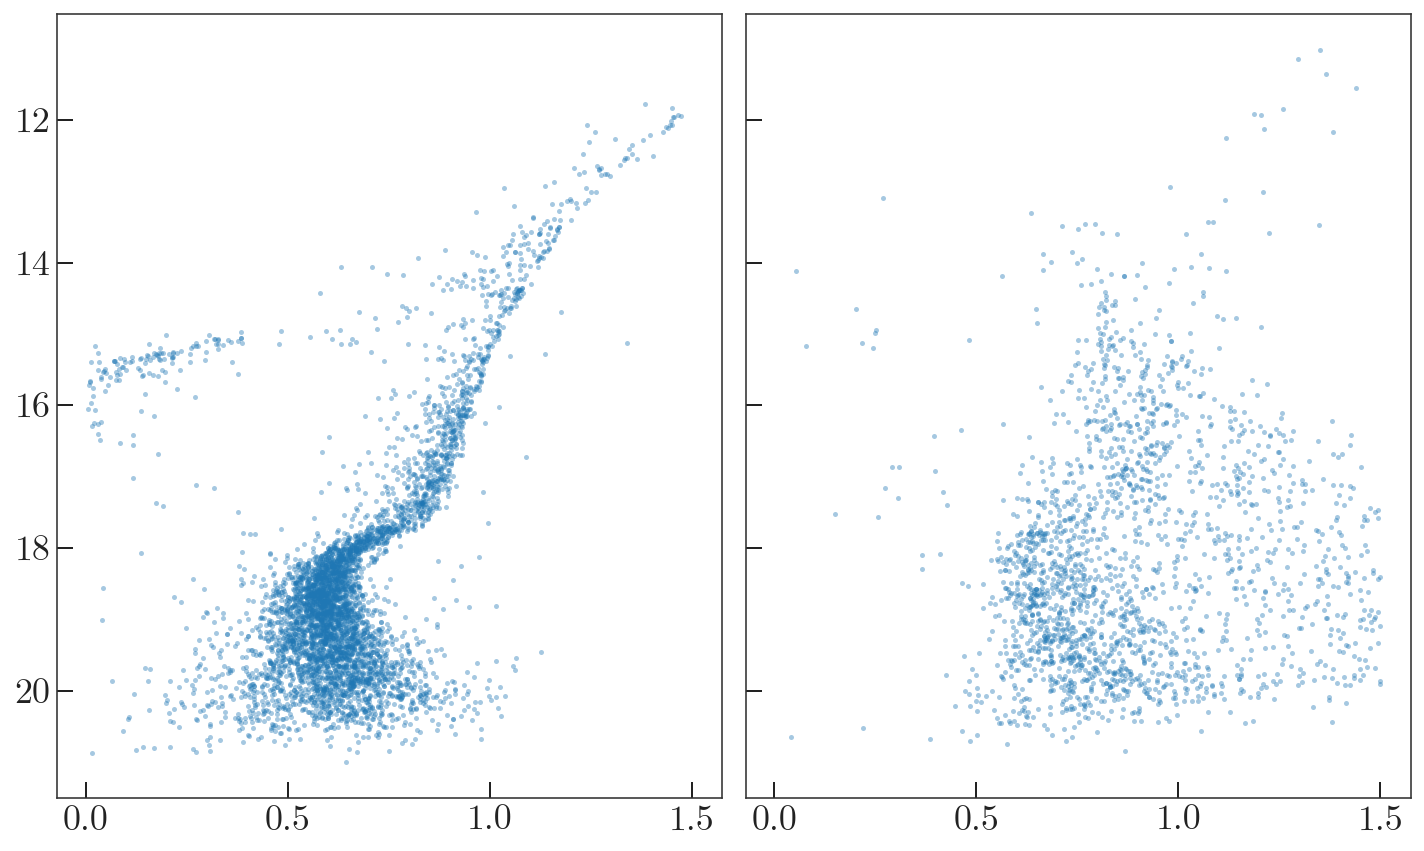

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

ax = axes[0]
ax.plot(g.bp_rp[blob_mask], g.phot_g_mean_mag[blob_mask], 
        marker='.', alpha=0.4, linestyle='none')

ax = axes[1]
_phi1_mask = (gd1_c.phi1.wrap_at(180*u.deg) > -60*u.deg) & (gd1_c.phi1.wrap_at(180*u.deg) < -20*u.deg)
_phi2_mask = np.abs(gd1_c.phi2) < 0.5*u.deg
ax.plot(g.bp_rp[pm_mask & _phi2_mask & _phi1_mask], g.phot_g_mean_mag[pm_mask & _phi2_mask & _phi1_mask], 
        marker='.', alpha=0.4, linestyle='none')

ax.invert_yaxis()
fig.tight_layout()

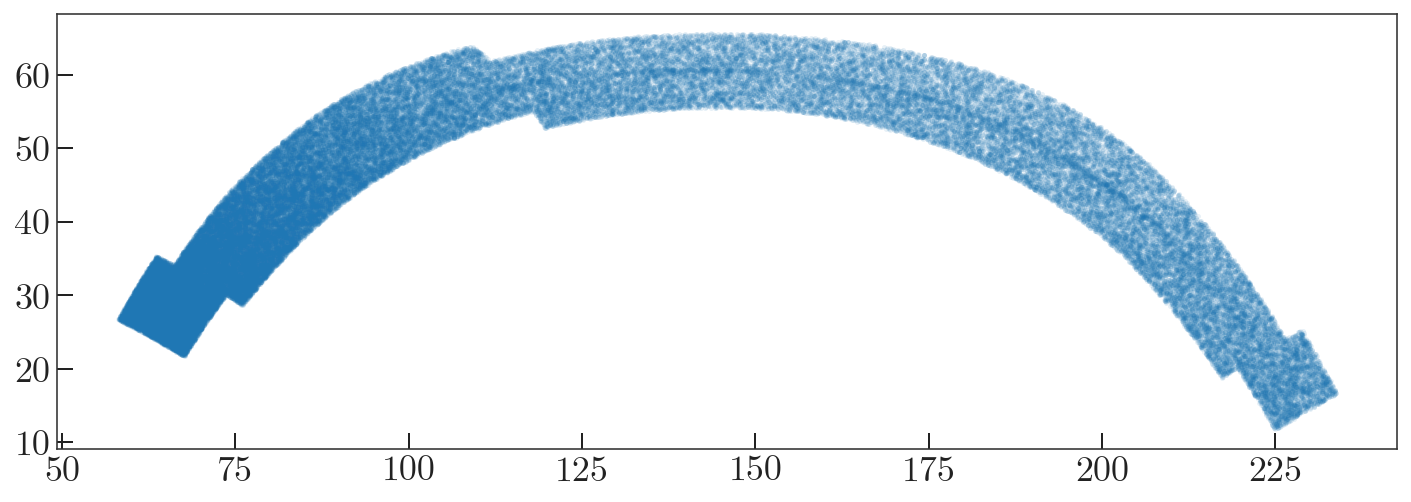

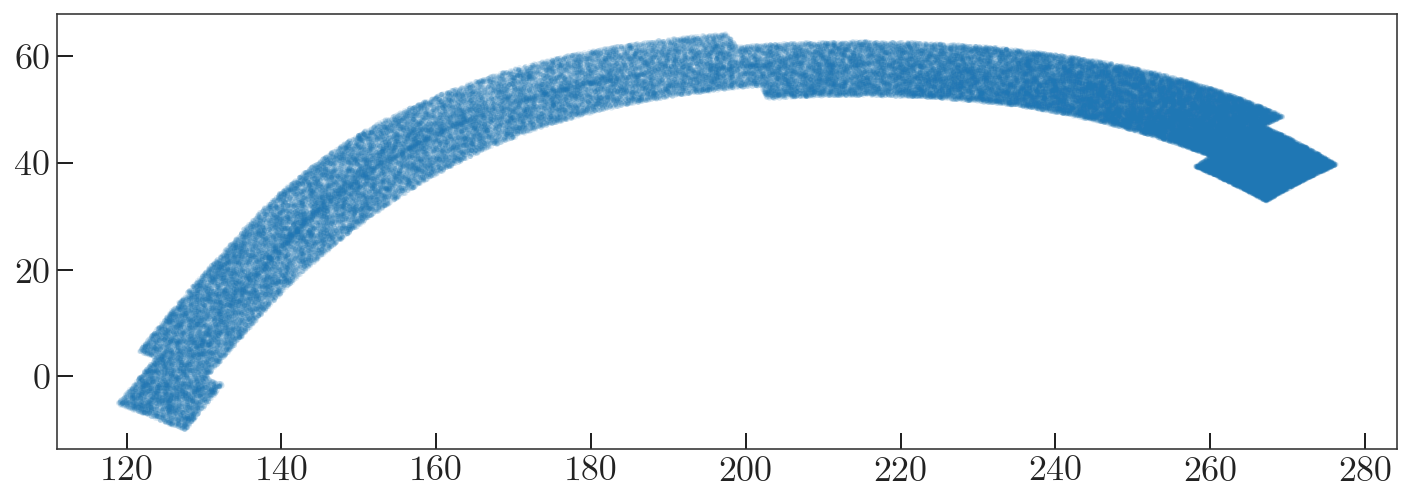

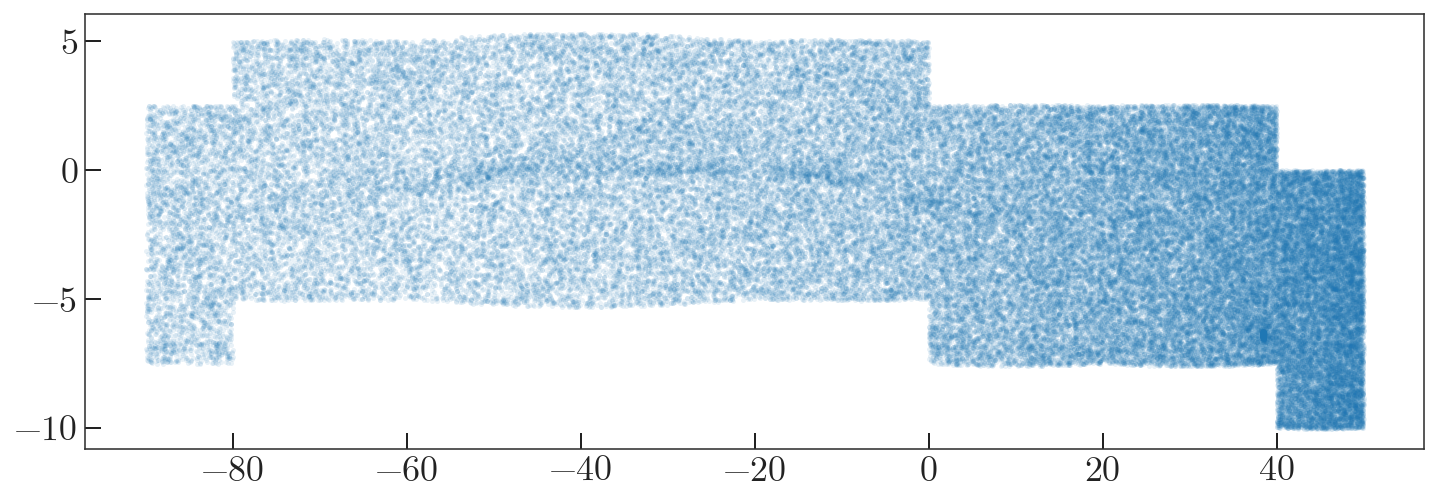

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
gd1_gal = gd1_c.transform_to(coord.Galactic)
ax.plot(gd1_gal.l[pm_mask].wrap_at(360*u.deg).degree, gd1_gal.b[pm_mask], 
        marker='.', alpha=0.1, linestyle='none')

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
gd1_icrs = gd1_c.transform_to(coord.ICRS)
ax.plot(gd1_icrs.ra[pm_mask].wrap_at(360*u.deg).degree, gd1_icrs.dec[pm_mask], 
        marker='.', alpha=0.1, linestyle='none')
# ax.set_xlim(255, 262.5)
# ax.set_ylim(42, 44)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(gd1_c.phi1[pm_mask].wrap_at(180*u.deg).degree, gd1_c.phi2[pm_mask], 
        marker='.', alpha=0.1, linestyle='none')

In [63]:
coord.Angle(259.2, u.degree).to_string(unit=u.hourangle)

'17h16m48s'

In [66]:
coord.Angle(43.2, u.degree).to_string(unit=u.degree)

'43d12m00s'

In [68]:
# better_pm_mask = ((gd1_c.pm_phi1_cosphi2 < -4.5*u.mas/u.yr) & (gd1_c.pm_phi1_cosphi2 > -8.5*u.mas/u.yr) & 
#                   (gd1_c.pm_phi2 < 0.5*u.mas/u.yr) & (gd1_c.pm_phi2 > -1.25*u.mas/u.yr) & 
#                   (g.bp_rp < 1.5*u.mag) & (g.bp_rp > 0*u.mag))
# better_pm_mask.sum()
# obsolete?

better_pm_mask = pm_mask

In [69]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ax = axes[0]
# ax.plot(g.pmra[phi2_mask], g.pmdec[phi2_mask], marker=',', linestyle='none', alpha=0.25)

# ax.set_xlim(-30, 30.)
# ax.set_ylim(-30, 30)
# ax.set_xlabel(r'$\mu_\alpha$')
# ax.set_ylabel(r'$\mu_\delta$')

# ax = axes[1]
# ax.plot(gd1_c.pm_phi1_cosphi2.to(u.mas/u.yr)[phi2_mask], 
#         gd1_c.pm_phi2.to(u.mas/u.yr)[phi2_mask], 
#         marker=',', linestyle='none', alpha=1.)

# ax.plot(gd1_c.pm_phi1_cosphi2.to(u.mas/u.yr)[phi2_mask & better_pm_mask], 
#         gd1_c.pm_phi2.to(u.mas/u.yr)[phi2_mask & better_pm_mask], 
#         marker=',', linestyle='none', alpha=1.)

# ax.set_xlim(-15, 0.)
# ax.set_ylim(-7.5, 7.5)
# ax.set_xlabel(r'$\mu_{\phi,1}$')
# ax.set_ylabel(r'$\mu_{\phi,2}$')

# fig.set_facecolor('w')
# fig.tight_layout()

/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


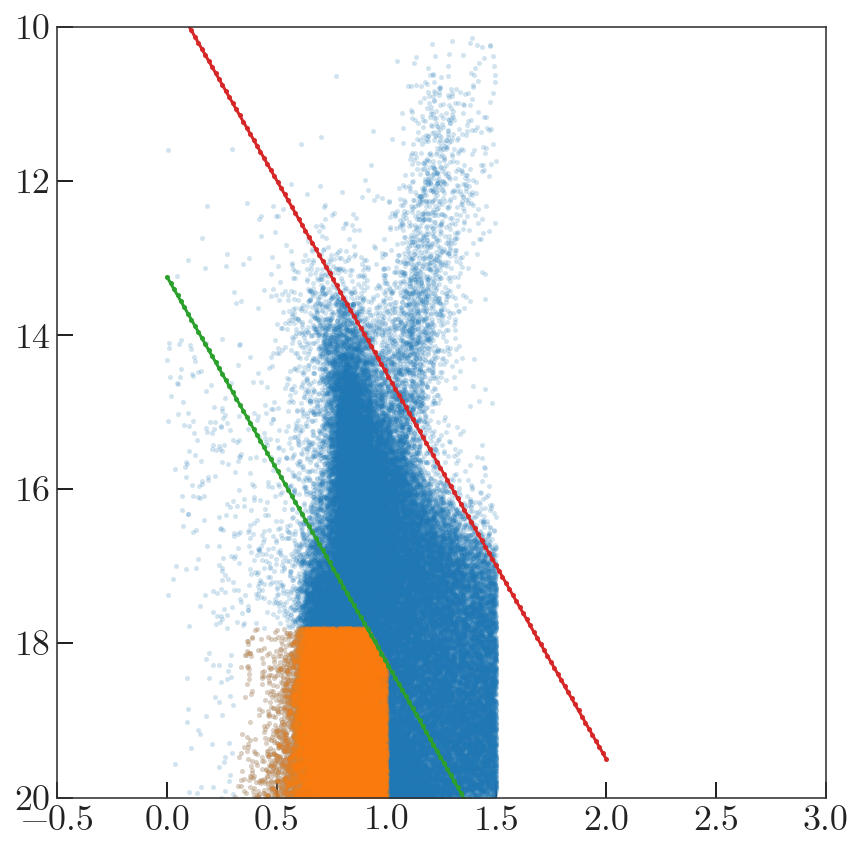

In [70]:
# color_mask = ((g.phot_g_mean_mag > (5*g.bp_rp + 13.25*u.mag)) | 
#               (g.phot_g_mean_mag < (5*g.bp_rp + 9.5*u.mag)))
color_mask = ((g.bp_rp > 0.3*u.mag) & (g.bp_rp < 1*u.mag) & 
              (g.phot_g_mean_mag > 17.8*u.mag) & 
              (g.phot_g_mean_mag > (5*g.bp_rp + 13.25*u.mag)))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(g.bp_rp[better_pm_mask], g.phot_g_mean_mag[better_pm_mask], 
        marker='.', linestyle='none', alpha=0.2)
ax.plot(g.bp_rp[better_pm_mask & color_mask], g.phot_g_mean_mag[better_pm_mask & color_mask], 
        marker='.', linestyle='none', alpha=0.2)

xx = np.linspace(0, 2, 128)
ax.plot(xx, 5*xx + 13.25)
ax.plot(xx, 5*xx + 9.5)
# ax.plot(xx, 5*xx + 9.5)

ax.set_ylim(20, 10)
ax.set_xlim(-0.5, 3.)
fig.tight_layout()

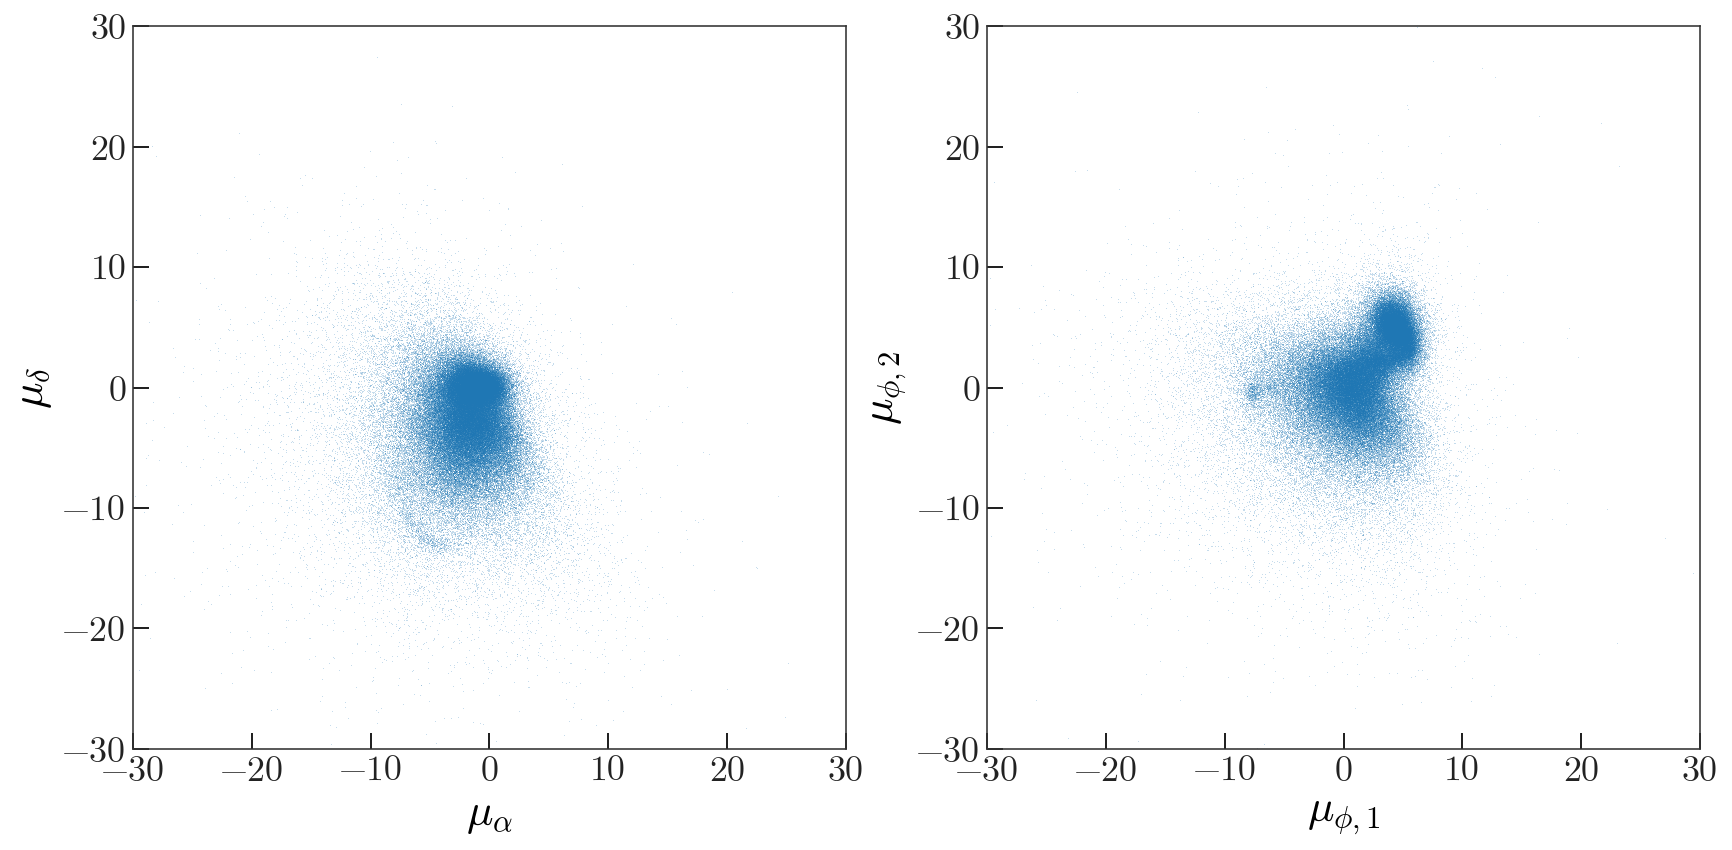

In [106]:
phi2_mask = np.abs(gd1_c.phi2) < 1*u.deg

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
ax.plot(g.pmra[phi2_mask & color_mask], g.pmdec[phi2_mask & color_mask], 
        marker=',', linestyle='none', alpha=0.25)

ax.set_xlim(-30, 30.)
ax.set_ylim(-30, 30)
ax.set_xlabel(r'$\mu_\alpha$')
ax.set_ylabel(r'$\mu_\delta$')

ax = axes[1]
ax.plot(gd1_c.pm_phi1_cosphi2.to(u.mas/u.yr)[phi2_mask & color_mask], 
        gd1_c.pm_phi2.to(u.mas/u.yr)[phi2_mask & color_mask], 
        marker=',', linestyle='none', alpha=0.25)

# ax.set_xlim(-12, 0.)
# ax.set_ylim(-4, 5)
ax.set_xlim(-30, 30.)
ax.set_ylim(-30, 30)
ax.set_xlabel(r'$\mu_{\phi,1}$')
ax.set_ylabel(r'$\mu_{\phi,2}$')

fig.set_facecolor('w')
fig.tight_layout()

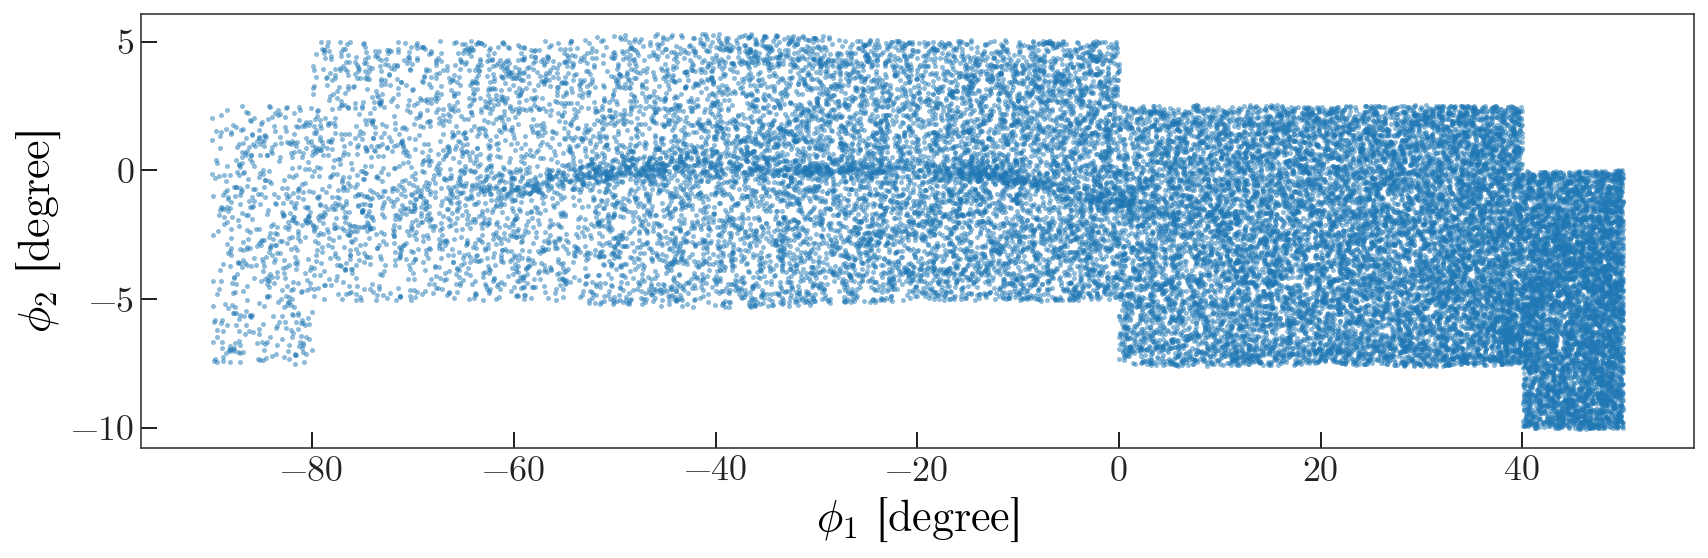

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(gd1_c.phi1[color_mask & better_pm_mask].wrap_at(180*u.deg).degree, 
        gd1_c.phi2[color_mask & better_pm_mask], 
        marker='.', alpha=0.5, linestyle='none')

ax.set_xlabel('$\phi_1$ [degree]')
ax.set_ylabel('$\phi_2$ [degree]')

fig.tight_layout()

In [73]:
# bins1 = np.arange(280, 360+0.5, 0.3)
bins1 = np.arange(-80, 20, 0.3)
bins2 = np.arange(-5, 5+0.5, 0.3)

In [74]:
from scipy.ndimage import gaussian_filter1d

In [75]:
gal = gd1_c.transform_to(coord.Galactic)

/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


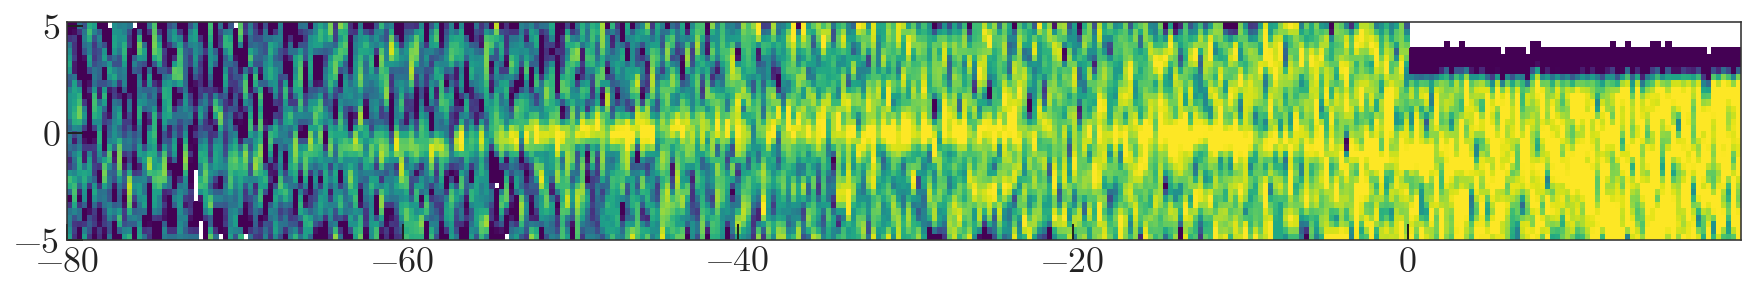

In [76]:
H, xe, ye = np.histogram2d(gd1_c.phi1[color_mask & better_pm_mask].wrap_at(188*u.deg).value, 
                           gd1_c.phi2[color_mask & better_pm_mask],
                           bins=(bins1, bins2))
H = gaussian_filter1d(H, 1.2)
fig, ax = plt.subplots(1, 1, figsize=(15, 2))
# plt.pcolormesh(xe, ye, H.T)
plt.pcolormesh(xe, ye, np.log(H.T), vmin=-1.5, vmax=1)

In [77]:
# thing  = np.log(H.T).ravel()
# plt.hist(thing[np.isfinite(thing)], bins='auto');

In [78]:
OMG_mask = ((gd1_c.phi1 > 320*u.deg) & (gd1_c.phi1 < 330*u.deg) & 
            (gd1_c.phi2 > 0.5*u.deg) & (gd1_c.phi2 < 1.7*u.deg))

OMG_stream_mask = ((gd1_c.phi1 > 320*u.deg) & (gd1_c.phi1 < 330*u.deg) & 
                   (gd1_c.phi2 > -0.5*u.deg) & (gd1_c.phi2 < 0.5*u.deg))

OMG_pm_mask = np.sqrt( (gd1_c.pm_phi1_cosphi2 - (-8*u.mas/u.yr))**2 + 
                       (gd1_c.pm_phi2 - (-0.6*u.mas/u.yr))**2 ) < 0.7*u.mas/u.yr

OMG_control_pm_mask = np.sqrt( (gd1_c.pm_phi1_cosphi2 - (-8*u.mas/u.yr))**2 + 
                               (gd1_c.pm_phi2 - (1.6*u.mas/u.yr))**2 ) < 0.7*u.mas/u.yr

(color_mask & OMG_mask).sum()

3221

In [79]:
(color_mask & OMG_mask).sum()

3221

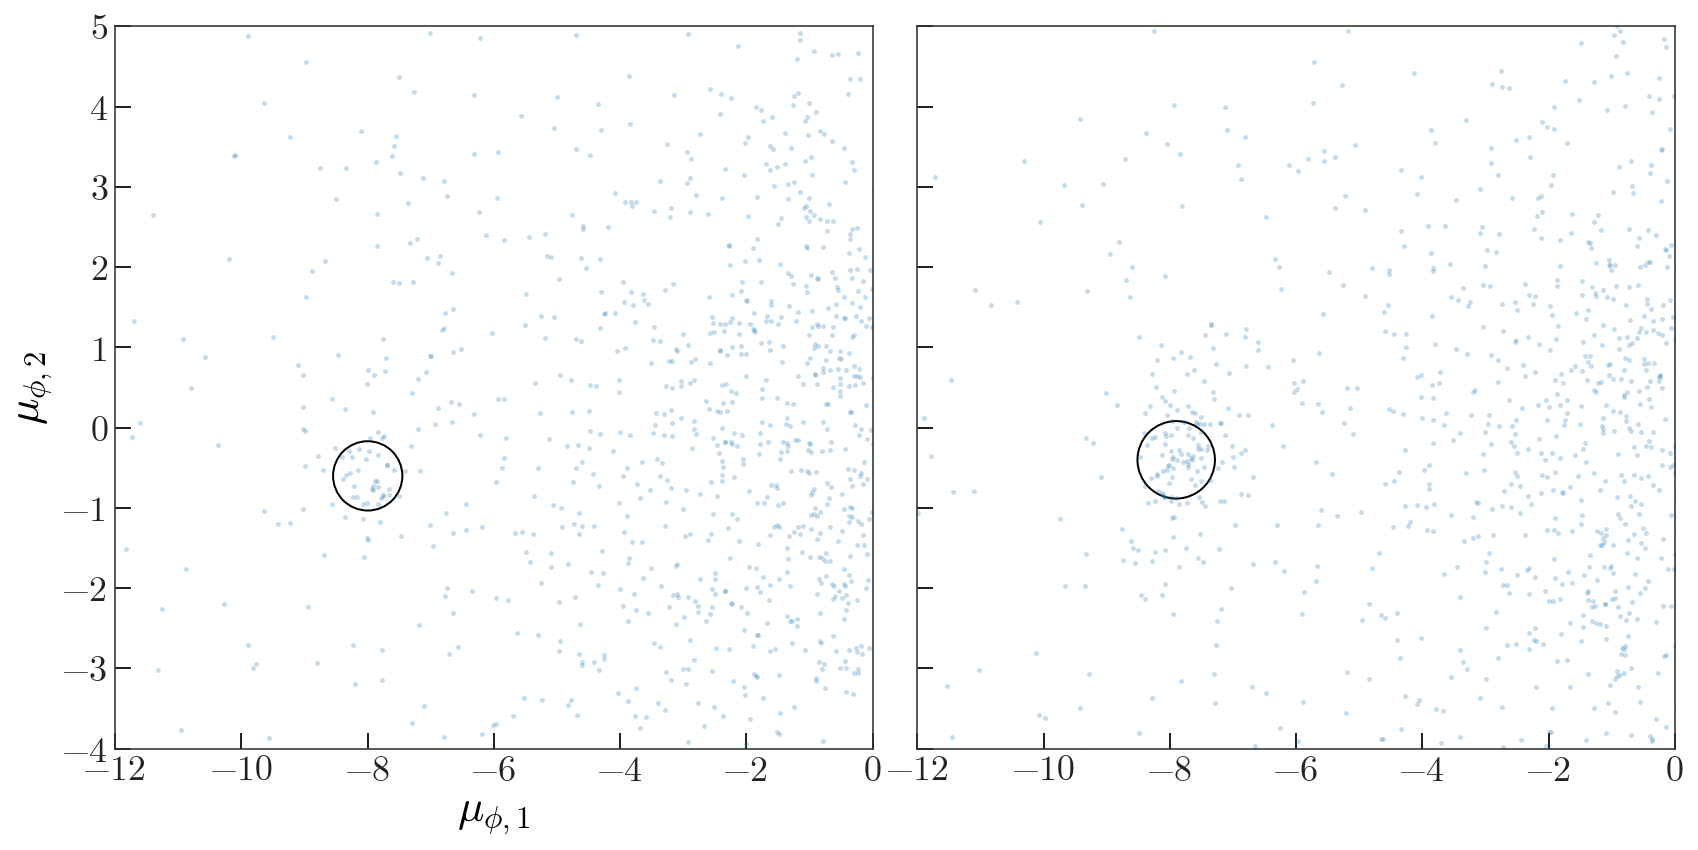

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax = axes[0]
ax.plot(gd1_c.pm_phi1_cosphi2.to(u.mas/u.yr)[color_mask & OMG_mask], 
        gd1_c.pm_phi2.to(u.mas/u.yr)[color_mask & OMG_mask], 
        marker='.', linestyle='none', alpha=0.25)

ax.set_xlim(-12, 0.)
ax.set_ylim(-4, 5)
ax.set_xlabel(r'$\mu_{\phi,1}$')
ax.set_ylabel(r'$\mu_{\phi,2}$')

ax.scatter(-8, -0.6, marker='o', facecolor='none', 
           edgecolor='k', linewidth=1, s=1200)

ax = axes[1]
ax.plot(gd1_c.pm_phi1_cosphi2.to(u.mas/u.yr)[color_mask & OMG_stream_mask], 
        gd1_c.pm_phi2.to(u.mas/u.yr)[color_mask & OMG_stream_mask], 
        marker='.', linestyle='none', alpha=0.25)

# ax.scatter(-13.2, -3.4, marker='o', facecolor='none', 
#            edgecolor='k', linewidth=1, s=700)
ax.scatter(-7.9, -0.4, marker='o', facecolor='none', 
           edgecolor='k', linewidth=1, s=1500)

fig.set_facecolor('w')
fig.tight_layout()

In [44]:
d_pm = np.sqrt((-13.2 - (-12.9))**2 + .4**2) * u.mas/u.yr
(d_pm * 8*u.kpc).to(u.km/u.s, u.dimensionless_angles())

<Quantity 18.96188185 km / s>

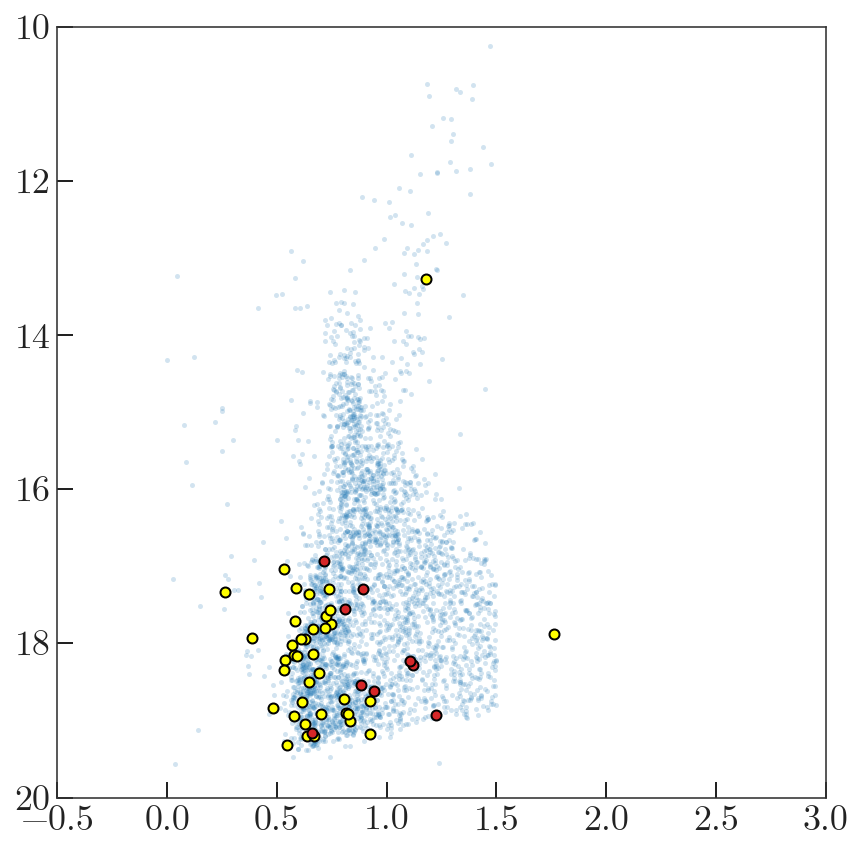

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(g.bp_rp[better_pm_mask], g.phot_g_mean_mag[better_pm_mask], 
        marker='.', linestyle='none', alpha=0.2)

ax.plot(g.bp_rp[color_mask & OMG_mask & OMG_pm_mask], g.phot_g_mean_mag[color_mask & OMG_mask & OMG_pm_mask], 
        marker='o', linestyle='none', alpha=1., color='yellow', markeredgecolor='k', markeredgewidth=1)

ax.plot(g.bp_rp[color_mask & OMG_mask & OMG_control_pm_mask], 
        g.phot_g_mean_mag[color_mask & OMG_mask & OMG_control_pm_mask], 
        marker='o', linestyle='none', alpha=1., color='tab:red', markeredgecolor='k', markeredgewidth=1)

ax.set_ylim(20, 10)
ax.set_xlim(-0.5, 3.)
fig.tight_layout()

Text(0,0.5,'$\\phi_2$ [degree]')

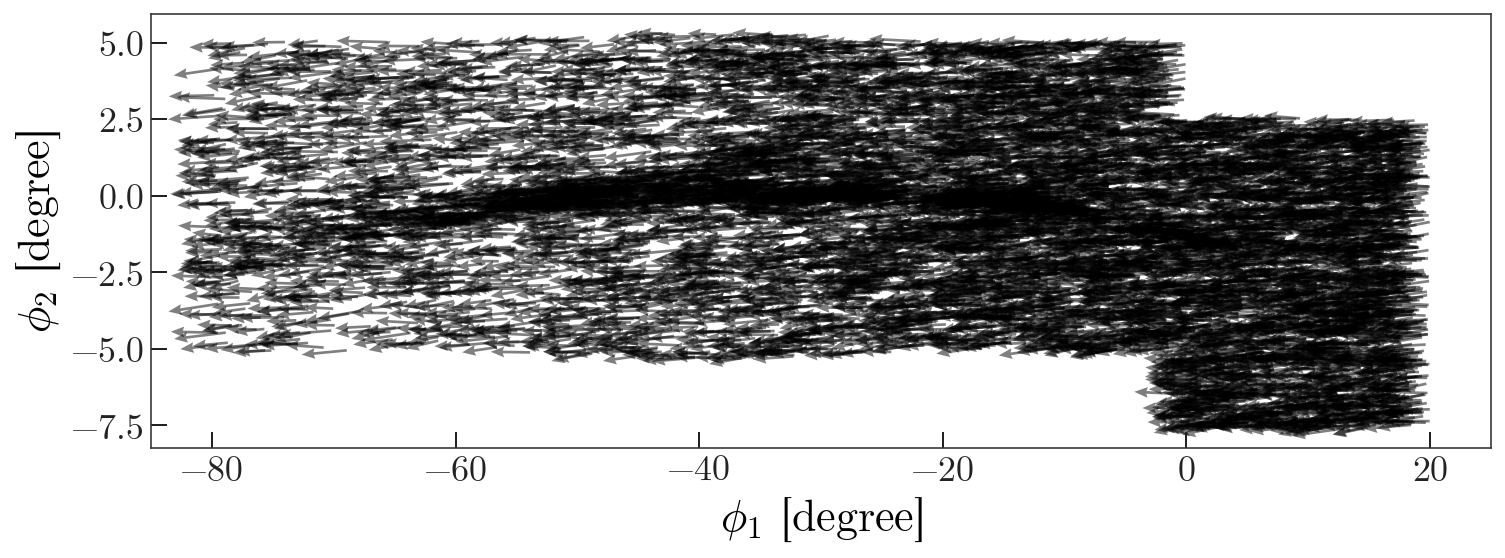

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.quiver(gd1_c.phi1[color_mask & better_pm_mask].wrap_at(180*u.deg).value, 
          gd1_c.phi2[color_mask & better_pm_mask].value,
          gd1_c.pm_phi1_cosphi2[color_mask & better_pm_mask].value,
          gd1_c.pm_phi2[color_mask & better_pm_mask].value,
          alpha=0.5, headwidth=4, headlength=5, scale=1E3, width=2E-3,
          rasterized=True)

ax.set_xlabel('$\phi_1$ [degree]')
ax.set_ylabel('$\phi_2$ [degree]')

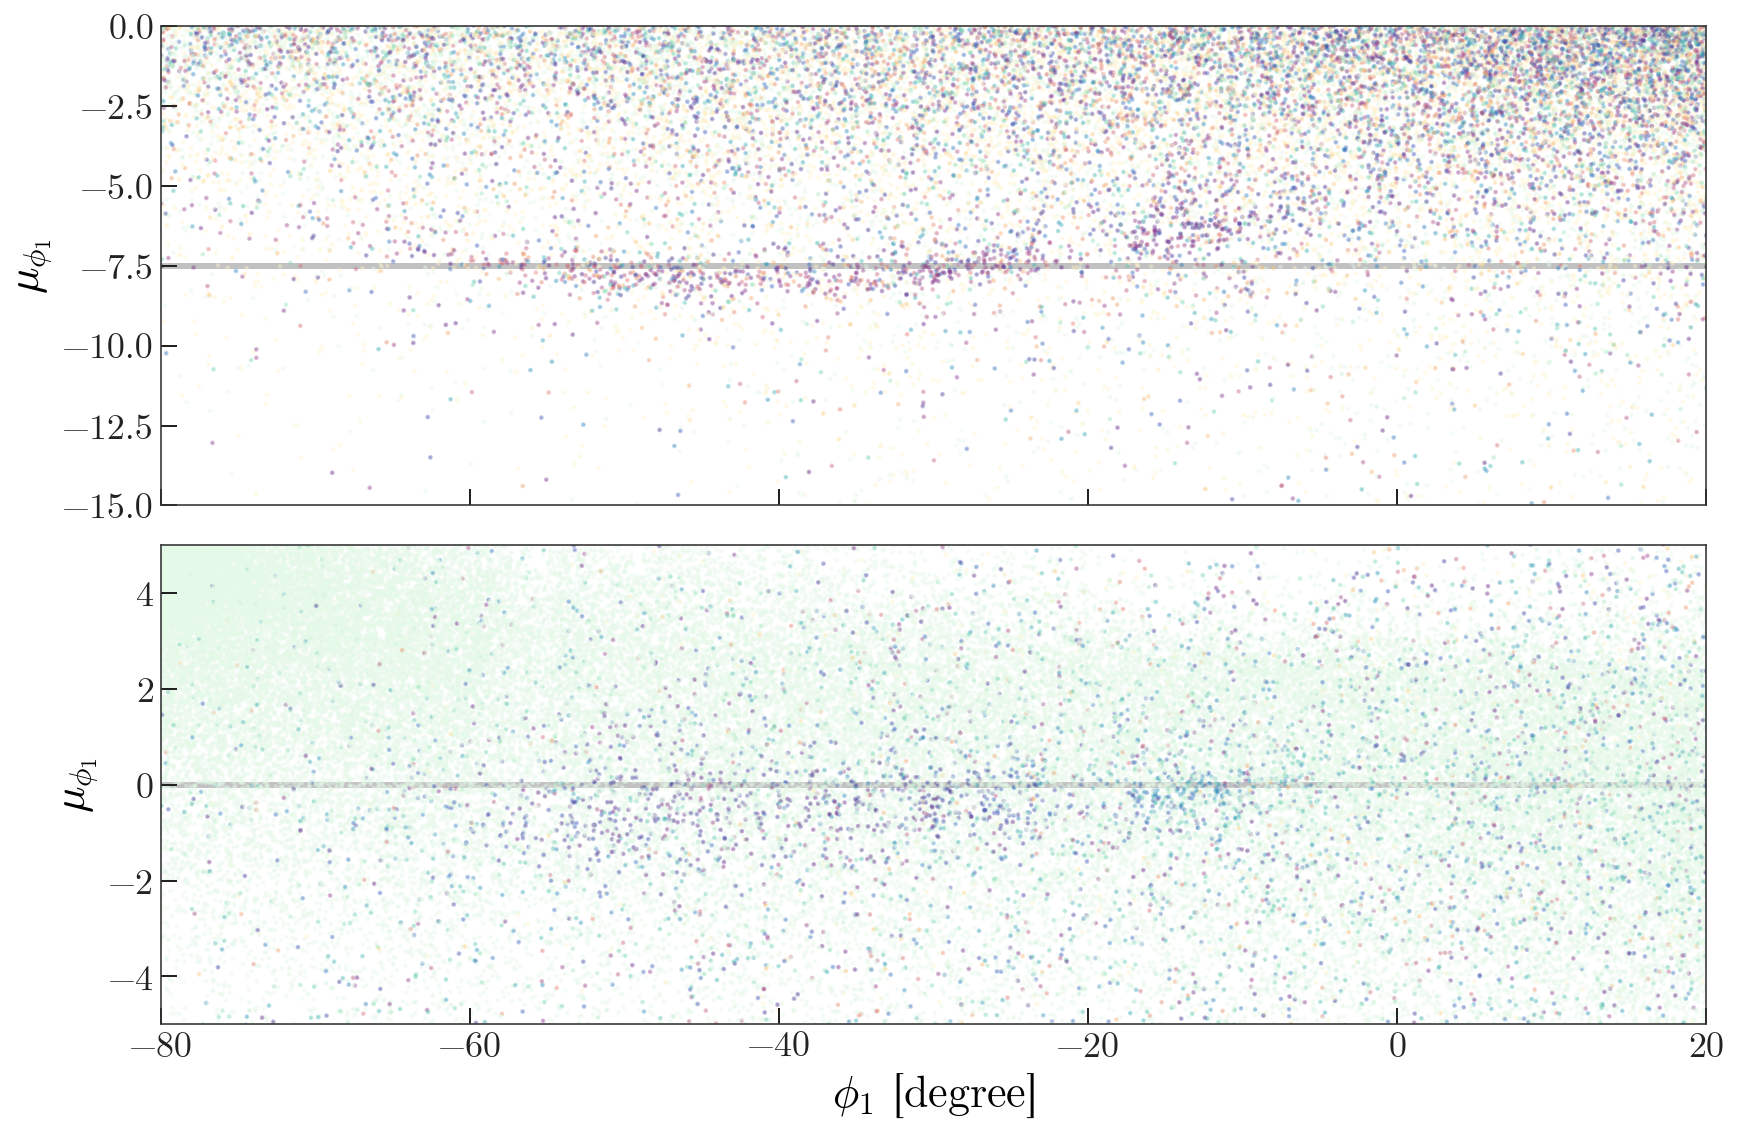

In [90]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax = axes[0]
ax.scatter(gd1_c.phi1[color_mask & phi2_mask].wrap_at(180*u.deg).value, 
           gd1_c.pm_phi1_cosphi2[color_mask & phi2_mask].to(u.mas/u.yr).value,
           c=gd1_c.pm_phi2[color_mask & phi2_mask].to(u.mas/u.yr).value,
           alpha=0.3, marker='.', vmin=-2, vmax=2, cmap=center_emph, s=8)

ax.axhline(-7.5, zorder=-100, alpha=0.4, linewidth=3)

# ax.set_xlabel('$\phi_1$ [degree]')
ax.set_ylabel(r'$\mu_{\phi_1}$')

ax.set_xlim(-80, 20)
ax.set_ylim(-15, 0)

ax = axes[1]
ax.scatter(gd1_c.phi1[color_mask & phi2_mask].wrap_at(180*u.deg).value, 
           gd1_c.pm_phi2[color_mask & phi2_mask].to(u.mas/u.yr).value,
           c=gd1_c.pm_phi1_cosphi2[color_mask & phi2_mask].to(u.mas/u.yr).value,
           alpha=0.3, marker='.', vmin=-12, vmax=-4, cmap=center_emph, s=8)

ax.axhline(0, zorder=-100, alpha=0.4, linewidth=3)

ax.set_xlabel('$\phi_1$ [degree]')
ax.set_ylabel(r'$\mu_{\phi_1}$')

ax.set_ylim(-5, 5)

fig.tight_layout()

# MDM targets

In [48]:
iso = ascii.read('../data/gd1-isochrone.cmd', header_start=12)

In [49]:
# control_cut = ((gd1_c.phi1 > 315*u.deg) & (gd1_c.phi1 < 330*u.deg) & 
#                ((gd1_c.phi2 > 1*u.deg) | (gd1_c.phi2 < -1*u.deg)))

control_cut = ((gd1_c.pm_phi1_cosphi2 < -6*u.mas/u.yr) & (gd1_c.pm_phi1_cosphi2 > -8.5*u.mas/u.yr) & 
               (gd1_c.pm_phi2 < 2.5*u.mas/u.yr) & (gd1_c.pm_phi2 > 0*u.mas/u.yr) & 
               (g.bp_rp < 1.5*u.mag) & (g.bp_rp > 0*u.mag))

/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [50]:
mdm_cut = ((g.phot_g_mean_mag < 15*u.mag) & (g.bp_rp > 0.5*u.mag) & 
           (g.phot_g_mean_mag < (5*g.bp_rp + 9.3*u.mag)) &
           (g.phot_g_mean_mag > (-5*g.bp_rp + 22*u.mag)))

/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/adrian/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


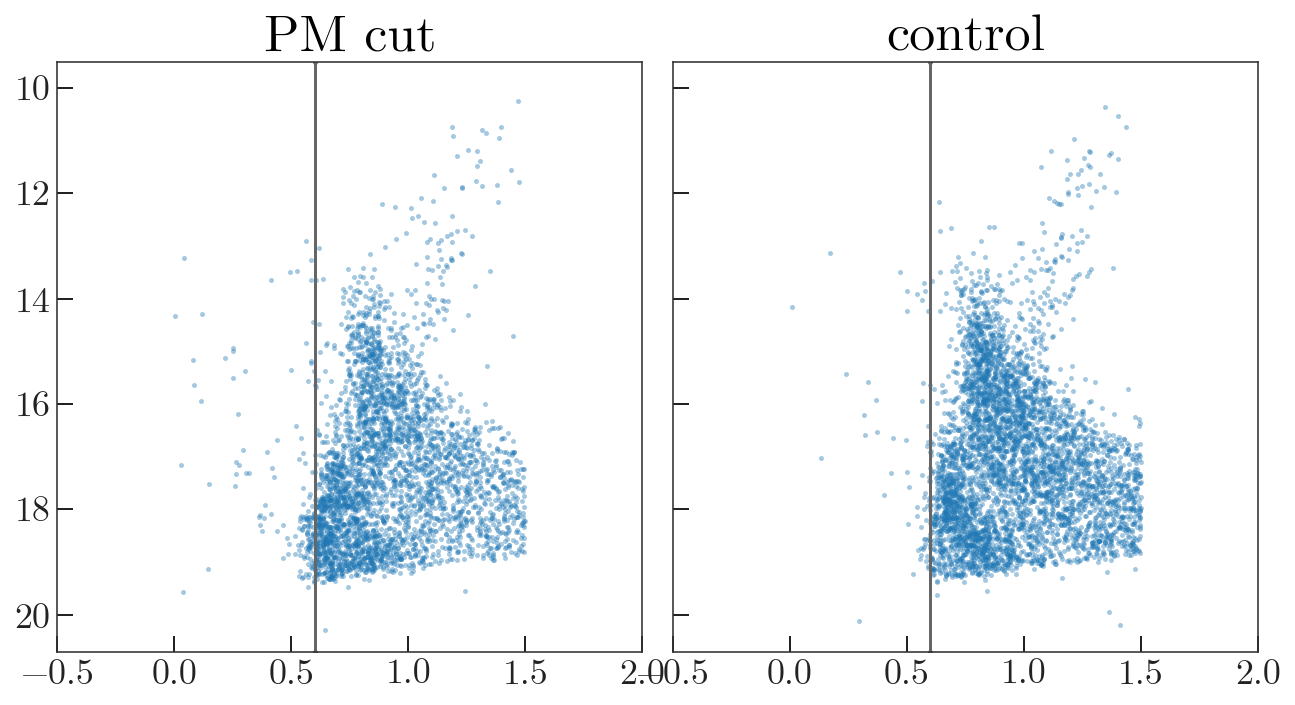

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5), sharex=True, sharey=True)

ax = axes[0]
ax.plot(g.bp_rp[better_pm_mask], 
        g.phot_g_mean_mag[better_pm_mask], 
        marker='.', linestyle='none', alpha=0.4)
ax.axvline(0.6)

ax = axes[1]
ax.plot(g.bp_rp[control_cut], 
        g.phot_g_mean_mag[control_cut], 
        marker='.', linestyle='none', alpha=0.4)

# plt.plot(iso['Gaia_BP_DR2Rev'] - iso['Gaia_RP_DR2Rev'],
#          iso['Gaia_G_DR2Rev'] + coord.Distance(gd1_dist(coord.Angle(350*u.deg))).distmod.value)

# xx = np.linspace(0, 2, 128)
# plt.plot(xx, -8*xx + 18.5)

ax.set_xlim(-0.5, 2)
ax.set_ylim(20.7, 9.5)
ax.axvline(0.6)

axes[0].set_title('PM cut')
axes[1].set_title('control')

fig.tight_layout()

(20.7, 9.5)

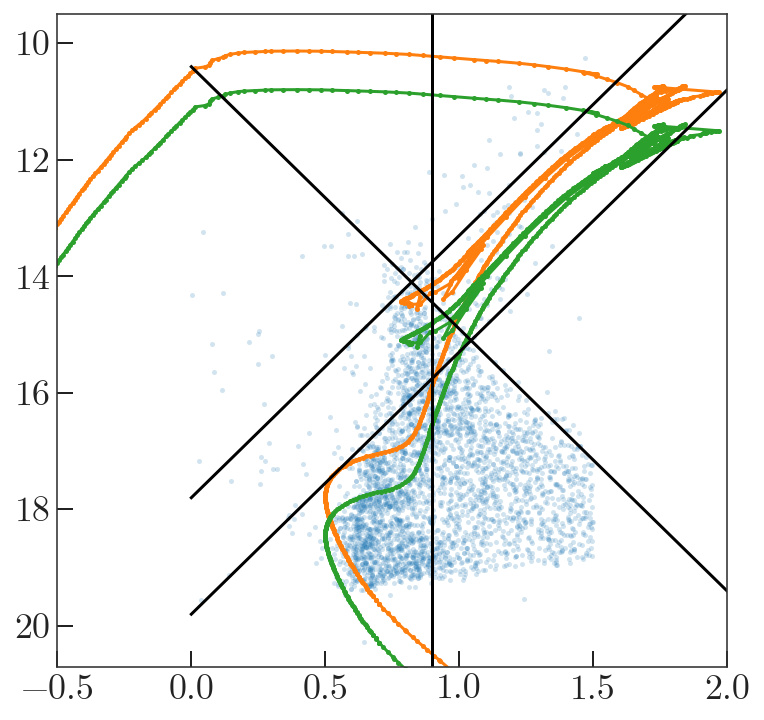

In [52]:
plt.figure(figsize=(6, 6))

plt.plot(g.bp_rp[better_pm_mask], 
         g.phot_g_mean_mag[better_pm_mask], 
         marker='.', linestyle='none', alpha=0.2)

plt.plot(iso['Gaia_BP_DR2Rev'] - iso['Gaia_RP_DR2Rev'],
         iso['Gaia_G_DR2Rev'] + coord.Distance(gd1_dist(coord.Angle(300*u.deg))).distmod.value)
plt.plot(iso['Gaia_BP_DR2Rev'] - iso['Gaia_RP_DR2Rev'],
         iso['Gaia_G_DR2Rev'] + coord.Distance(gd1_dist(coord.Angle(350*u.deg))).distmod.value)

xx = np.linspace(0, 2, 128)
plt.plot(xx, -4.5*xx + 17.8, color='k', marker='')
plt.plot(xx, -4.5*xx + 19.8, color='k', marker='')
plt.plot(xx, 4.5*xx + 10.4, color='k', marker='')
plt.axvline(0.9, color='k', marker='')

plt.xlim(-0.5, 2)
plt.ylim(20.7, 9.5)

In [53]:
sup = ((g.parallax[better_pm_mask] > 0) & 
       ((g.parallax[better_pm_mask] / g.parallax_error[better_pm_mask]) > 6))

G = g.phot_g_mean_mag[better_pm_mask]
bprp = g.bp_rp[better_pm_mask]

obs_mask = ((G > (-4.5*bprp + 17.8*u.mag)) & 
            (G < (-4.5*bprp + 19.8*u.mag)) & 
            (G < (4.5*bprp + 10.4*u.mag)) &
            (bprp > 0.9*u.mag))
sup &= obs_mask

sup2 = (((g.phot_g_mean_mag[better_pm_mask][sup] - g[better_pm_mask][sup].distmod) < 3.*u.mag) &
        (g.bp_rp[better_pm_mask][sup] > 0.8*u.mag))

len(g.parallax[better_pm_mask][sup][sup2])

33

In [54]:
obs_g = g[better_pm_mask][sup][sup2]

(20.7, 9.5)

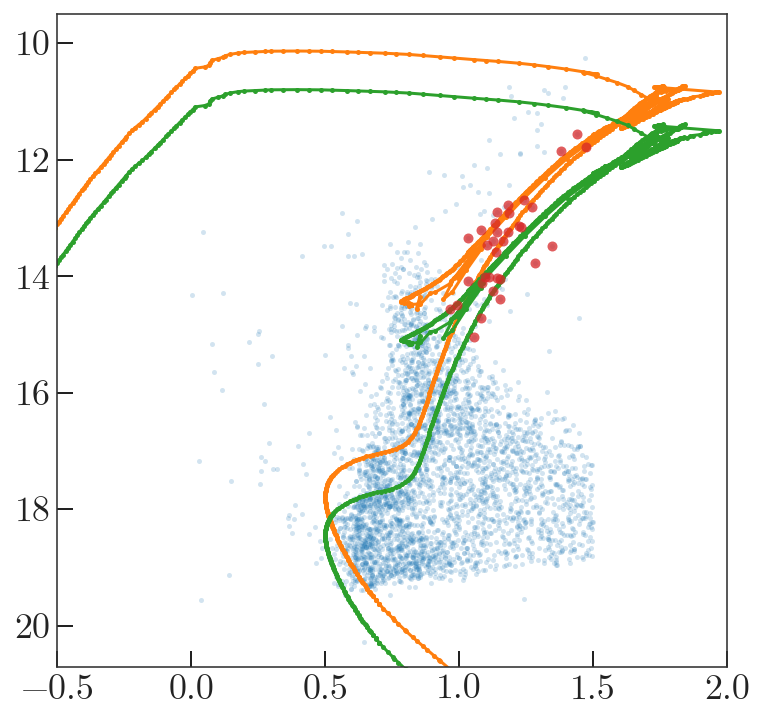

In [55]:
plt.figure(figsize=(6, 6))

plt.plot(g.bp_rp[better_pm_mask], 
         g.phot_g_mean_mag[better_pm_mask], 
         marker='.', linestyle='none', alpha=0.2)

plt.plot(iso['Gaia_BP_DR2Rev'] - iso['Gaia_RP_DR2Rev'],
         iso['Gaia_G_DR2Rev'] + coord.Distance(gd1_dist(coord.Angle(300*u.deg))).distmod.value)
plt.plot(iso['Gaia_BP_DR2Rev'] - iso['Gaia_RP_DR2Rev'],
         iso['Gaia_G_DR2Rev'] + coord.Distance(gd1_dist(coord.Angle(350*u.deg))).distmod.value)

plt.plot(obs_g.bp_rp, 
         obs_g.phot_g_mean_mag, 
         marker='o', linestyle='none', alpha=0.75)

# xx = np.linspace(0, 2, 128)
# plt.plot(xx, -4.5*xx + 17.8, color='k', marker='')
# plt.plot(xx, -4.5*xx + 19.8, color='k', marker='')
# plt.plot(xx, 4.5*xx + 10.4, color='k', marker='')
# plt.axvline(0.9, color='k', marker='')

plt.xlim(-0.5, 2)
plt.ylim(20.7, 9.5)

In [248]:
gd1_tbl = Table.from_pandas(obs_g.data)
gd1_tbl = gd1_tbl['ra', 'dec', 'phot_g_mean_mag']
gd1_tbl = gd1_tbl[np.argsort(gd1_tbl['ra'])]
gd1_tbl['name'] = ['GD1_{0:02d}'.format(i) for i in range(len(gd1_tbl))]
gd1_tbl = gd1_tbl['name', 'ra', 'dec', 'phot_g_mean_mag']

ra = coord.Angle(gd1_tbl['ra'] * u.deg)
dec = coord.Angle(gd1_tbl['dec'] * u.deg)
aaah = coord.SkyCoord(ra=ra, dec=dec)
gd1_tbl['ra_str'] = ra.to_string(unit=u.hourangle, sep=' ', precision=2)
gd1_tbl['dec_str'] = dec.to_string(unit=u.degree, sep=' ', precision=2)

gd1_tbl = gd1_tbl['name', 'ra_str', 'dec_str', 'phot_g_mean_mag']
gd1_tbl.write('/Users/adrian/projects/mdm-gaia/gd1.txt', format='ascii.basic')

In [238]:
from astropy.time import Time
from astroplan import FixedTarget, Observer, is_observable, AirmassConstraint, AtNightConstraint

In [244]:
observer = Observer(location=coord.EarthLocation.of_site('MDM'))

In [245]:
time_range = Time(['2018-04-25', '2018-04-29'])
constraints = [AirmassConstraint(max=2.5, boolean_constraint=False),
               AtNightConstraint.twilight_civil()]

In [246]:
targets = [FixedTarget(cc) for cc in aaah]
is_observable(constraints, observer, targets, time_range=time_range)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])